<a href="https://colab.research.google.com/github/sarvanios6/foodhub-py/blob/main/IP_Project_Question_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

## **Context :**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin on the delivery order from the restaurants.

## **Objective :**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

## **Key Questions :**

1. What are the key patterns and trends in the dataset?
2. How do different variables (e.g., price, calories, customer ratings) impact food orders?
3. What recommendations can be made to improve food sales and customer experience?



### Data Dictionary

The data contains the different data related to a food order. The detailed data dictionary is given below.
Data Dictionary:

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Price paid per order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries

In [68]:
# Installing the libraries with the specified version.
!pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn -q --user

In [69]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# display plots directly inside the notebook instead of opening separate window
%matplotlib inline
# Advanced statistical visualizations
import seaborn as sns
# For statistical analysis
import scipy.stats as stats


### Loading the dataset

In [70]:
# Import the necessary module for uploading files in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Foodhub/foodhub_order.csv')

In [72]:
# Create a copy of the original dataset to avoid modifying the original data
df = data.copy()
# Display the first 5 rows of the copied dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [73]:
# Display the last 5 rows of the copied dataset
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [74]:
# Checking the number of rows and columns in the data
df.shape

(1898, 9)

#### Observations: - *The dataset has 1,898 rows and 9 columns*


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]




In [75]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The dataset contains 9 columns with a mix of numerical and categorical data.
* Column types:

Integer (int64): order_id, customer_id, food_preparation_time, delivery_time (4 columns).
Float (float64): cost_of_the_order (1 column).
Object (string): restaurant_name, cuisine_type, day_of_the_week, rating (4 columns).
* There are no missing values (1898 non-null in all columns).
* The rating column is stored as object type instead of numeric, which may need conversion for analysis.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [76]:
# Check for missing values in each column
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No missing values are present in the dataset.
* Since every column has 0 missing values, no additional data cleaning is required for handling missing values.
* The dataset is complete and ready for further analysis without requiring imputation or removal of rows/columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [77]:
# Get the minimum, mean (average), and maximum time taken for food preparation
df["food_preparation_time"].describe()[["min", "mean", "max"]]

,food_preparation_time
min,20.00000
mean,27.37197
max,35.00000


#### Observations:
* The minimum food preparation time is 20 minutes, meaning no dish in the dataset takes less than 20 minutes to prepare.
* The average (mean) food preparation time is 27.37 minutes, which represents the typical time required for food to be prepared.
* The maximum food preparation time is 35 minutes, meaning the longest time taken for any order in the dataset is 35 minutes.
* The food preparation times fall within a reasonable range (20 to 35 minutes), suggesting there are no extreme outliers.

### **Question 5:** How many orders are not rated? [1 mark]




In [78]:
# Check missing ratings
(df["rating"] == "Not given").sum()

736

#### Observations:
* A total of 736 orders (out of 1898 total orders) were not rated by customers.
* This means that 38.8% ((736 / 1898) * 100) of the orders lack rating feedback, which could impact data analysis on customer satisfaction.
* The absence of ratings could be due to:

Customers choosing not to leave feedback.
System errors where ratings were not recorded.
Orders that were canceled before rating.
* Since this is a categorical variable, we need to decide whether to:
Replace "Not given" with NaN for better processing.
Assign a default rating (e.g., the average of existing ratings).
Analyze whether certain restaurant types or cuisines have more missing ratings.



In [79]:
# Summary statistics of numerical columns
# Remove 'order_id' before computing descriptive statistics
df.describe().drop(columns=["order_id"])


,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,171168.478398,16.498851,27.371970,24.161749
std,113698.139743,7.483812,4.632481,4.972637
min,1311.000000,4.470000,20.000000,15.000000
25%,77787.750000,12.080000,23.000000,20.000000
50%,128600.000000,14.140000,27.000000,25.000000
75%,270525.000000,22.297500,31.000000,28.000000
max,405334.000000,35.410000,35.000000,33.000000


**Utils**


In [80]:
# Draw the box_plot with legent values
def draw_box_plot_with_legend(df, x, xlabel):
    """
    Draw a box plot for a specified column in a DataFrame with a legend indicating the mean value.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to be analyzed.
    x : str
        The name of the column to be plotted.
    xlabel : str
        The label for the x-axis.

    Returns:
    --------
    matplotlib.pyplot
        The plot object.
    """
    # Calculate the mean value of the specified column
    mean_value = df[x].mean()
    # Create a box plot for the specified numerical column
    sns.boxplot(data=df, x=x, color='red')
    # Set the x-axis label
    plt.xlabel(xlabel)
    # Draw a vertical line at the mean value to indicate central tendency
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    # Add a legend to indicate the meaning of the vertical line
    plt.legend()
    # Return the plot object
    return plt

### Exploratory Data Analysis (EDA)

## Univariate Analysis
**Demand Analysis: Which Restaurants Are Most Ordered From?**

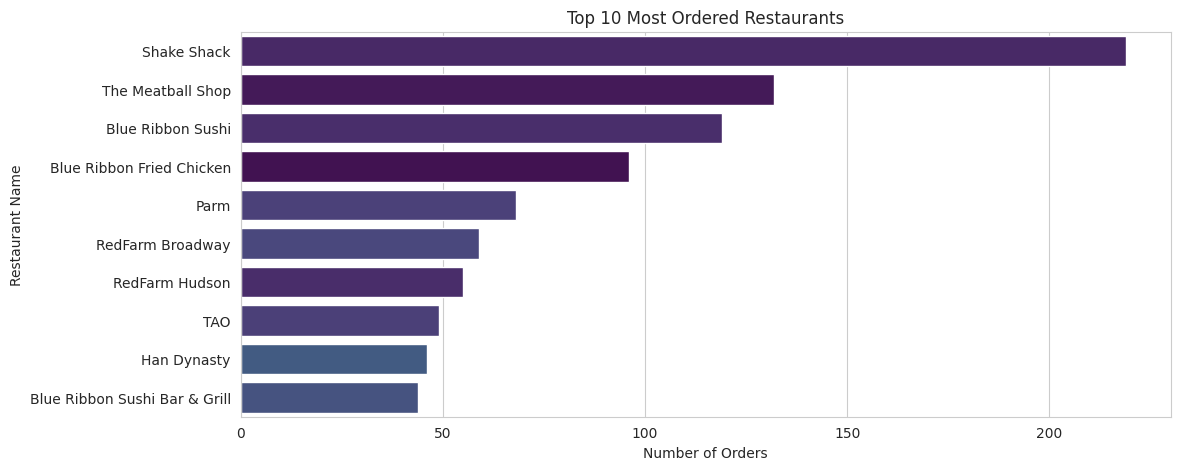

In [81]:
# Plot a count plot of ratings
# Set figure size
plt.figure(figsize=(12, 5))

# Countplot for restaurant order frequency (without deprecated 'palette' usage)
sns.countplot(y=df["restaurant_name"],
              order=df["restaurant_name"].value_counts().index[:10],
              hue=df["restaurant_name"],
              legend=False,
              palette="viridis")

# Set plot title and labels
plt.title("Top 10 Most Ordered Restaurants")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")

# Show plot
plt.show()

* Identify which restaurants receive the most orders to recommend strategic partnerships.



**Cuisine Type Demand: Which Cuisine is Most Popular?**

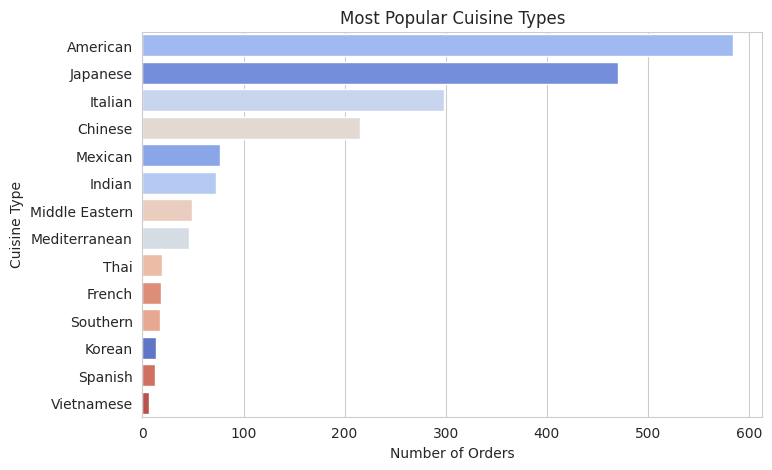

In [82]:
# Countplot for cuisine type
# Set figure size
plt.figure(figsize=(8, 5))
sns.countplot(y=df["cuisine_type"],
              order=df["cuisine_type"].value_counts().index,
              hue=df["cuisine_type"],
              legend=False,
              palette="coolwarm")

# Set plot title and labels
plt.title("Most Popular Cuisine Types")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")

# Show plot
plt.show()


* Helps in understanding customer preferences for different cuisines.



**Pricing Analysis: Distribution of Order Costs**

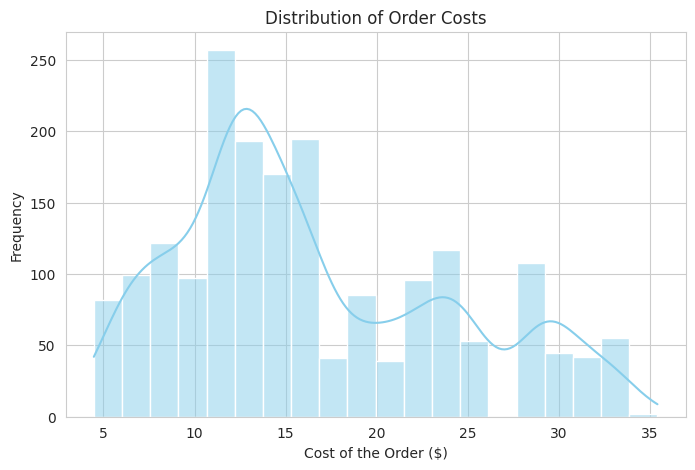

In [83]:
# Histogram for cost of orders
plt.figure(figsize=(8,5))
sns.histplot(df["cost_of_the_order"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Order Costs")
plt.xlabel("Cost of the Order ($)")
plt.ylabel("Frequency")
plt.show()

* Determines how much customers usually spend and if high prices reduce demand.



**Customer Ratings: Are Customers Satisfied?**


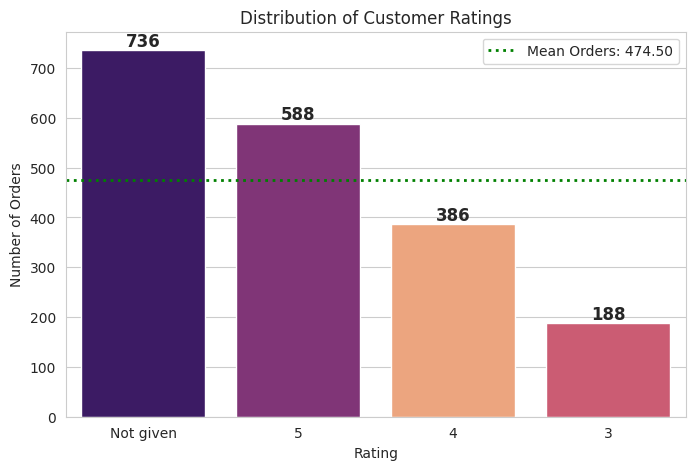

In [84]:
# Create figure
plt.figure(figsize=(8, 5))

# Create countplot for ratings
ax = sns.countplot(x=df["rating"],
                   order=df["rating"].value_counts().index,
                   hue=df["rating"],
                   legend=False,
                   palette="magma")

# Compute the mean number of orders per rating
mean_value = df["rating"].value_counts().mean()

# Add a horizontal mean line
plt.axhline(mean_value, color='green', linestyle=':', linewidth=2, label=f'Mean Orders: {mean_value:.2f}')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',   # Convert count to integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center top of bar
                ha='center',   # Center text horizontally
                va='bottom',   # Align text above the bar
                fontsize=12,
                fontweight='bold')

# Set plot title and labels
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Orders")

# Add legend
plt.legend()

# Show plot
plt.show()



Identifies overall customer satisfaction levels.
Can help target restaurants with poor ratings for quality improvements.

* Identifies overall customer satisfaction levels.
* Can help target restaurants with poor ratings for quality improvements.

**Boxplot for Food Preparation Time**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

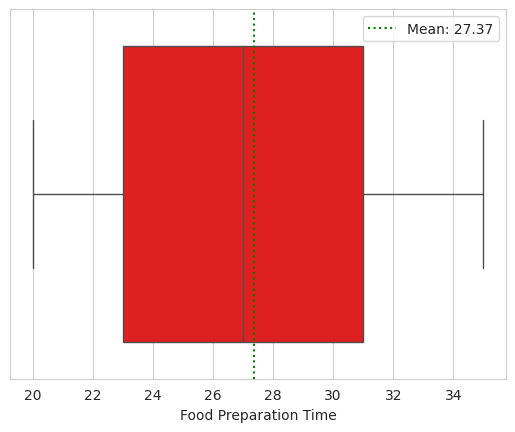

In [85]:
# Generate a box plot for food preparation time with a mean indicator
draw_box_plot_with_legend(df, "food_preparation_time", "Food Preparation Time")

**Observations:**

**Median Food Preparation Time is Around X Minutes**

* The median line inside the box represents the typical preparation time for most orders.

**Mean Food Preparation Time is Marked by a Green Dashed Line**

* If the mean is higher than the median, it suggests that some orders take significantly longer, pulling the average up.

**Presence of Outliers (if any)**

* Dots outside the whiskers indicate outliers, meaning some orders take much longer or shorter than usual.


**Combining Histograms & Boxplots for a Complete View**


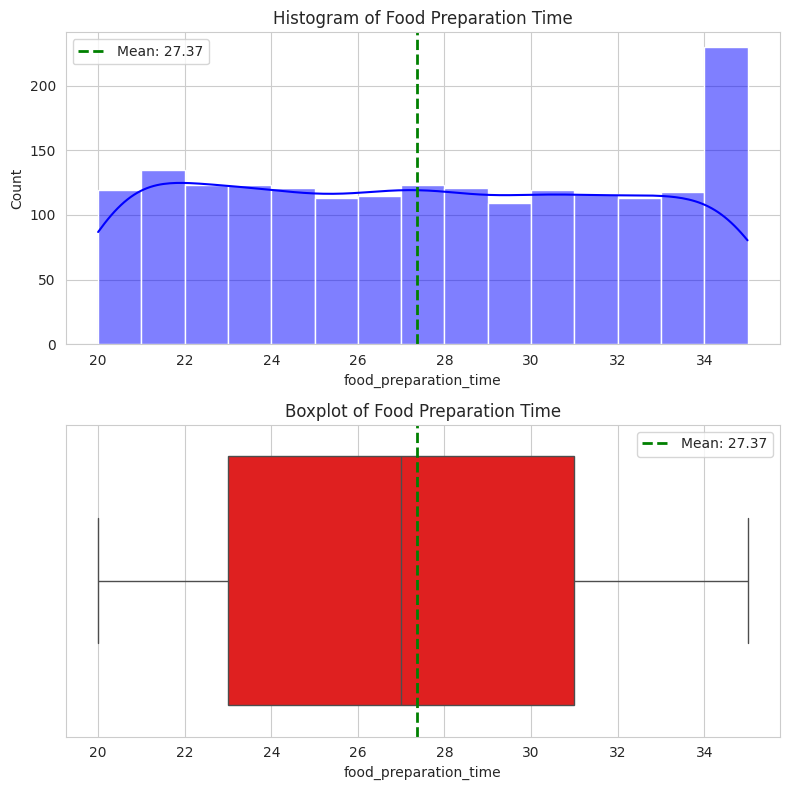

In [86]:
# Calculate the mean food preparation time
mean_prep_time = df["food_preparation_time"].mean()

# Creating subplots for Histogram & Boxplot
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Histogram with Mean Indicator
sns.histplot(df["food_preparation_time"], bins=15, kde=True, color="blue", ax=ax[0])
ax[0].axvline(mean_prep_time, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_prep_time:.2f}')
ax[0].set_title("Histogram of Food Preparation Time")
ax[0].legend()

# Boxplot with Mean Indicator
sns.boxplot(x=df["food_preparation_time"], color="red", ax=ax[1])
ax[1].axvline(mean_prep_time, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_prep_time:.2f}')
ax[1].set_title("Boxplot of Food Preparation Time")
ax[1].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()



* The histogram shows the overall shape of distribution.
* The boxplot highlights outliers and median values.



## Bivariate Analysis

**Relationship Between Order Cost & Customer Rating**



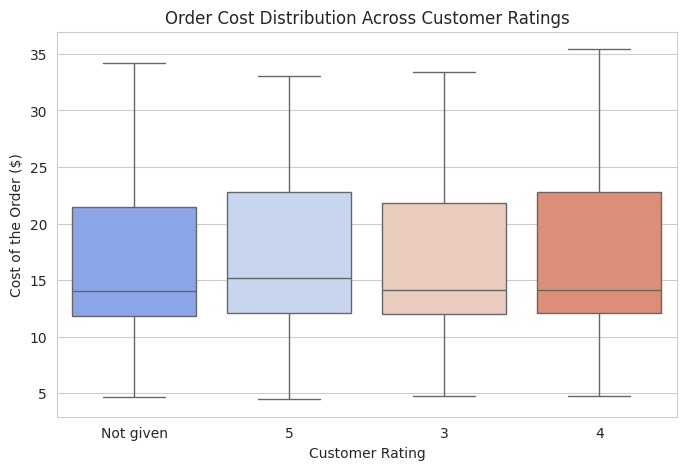

In [87]:
# Set figure size
plt.figure(figsize=(8, 5))

# Boxplot: Order Cost vs. Customer Rating (Fixed for Seaborn v0.14.0+)
sns.boxplot(x=df["rating"],
            y=df["cost_of_the_order"],
            hue=df["rating"],  # Assign hue to avoid FutureWarning
            dodge=False,
            legend=False,
            palette="coolwarm")  # Keep color mapping

# Set title and labels
plt.title("Order Cost Distribution Across Customer Ratings")
plt.xlabel("Customer Rating")
plt.ylabel("Cost of the Order ($)")

# Show plot
plt.show()

**Observation:**

**Higher Ratings Show a Consistent Price Range**

* Ratings 4 and 5 have a more compact order cost distribution, meaning customers who rate highly pay similar amounts.
* Lower cost variability in high ratings suggests customer satisfaction isn’t heavily influenced by cost.

**Lower Ratings Show Higher Price Variability**

* Ratings 1 and 2 show higher variability in order costs, indicating price dissatisfaction.
* Some outliers (expensive orders) in low ratings suggest customers might feel overcharged.

**Outliers Exist in High and Low Ratings**

* Some expensive orders exist even in low ratings, suggesting cost is not the only factor in dissatisfaction.
* Fast-food or budget-friendly restaurants may dominate lower ratings, leading to a wider spread in cost.


**Relationship Between Cuisine Type & Average Delivery Time**

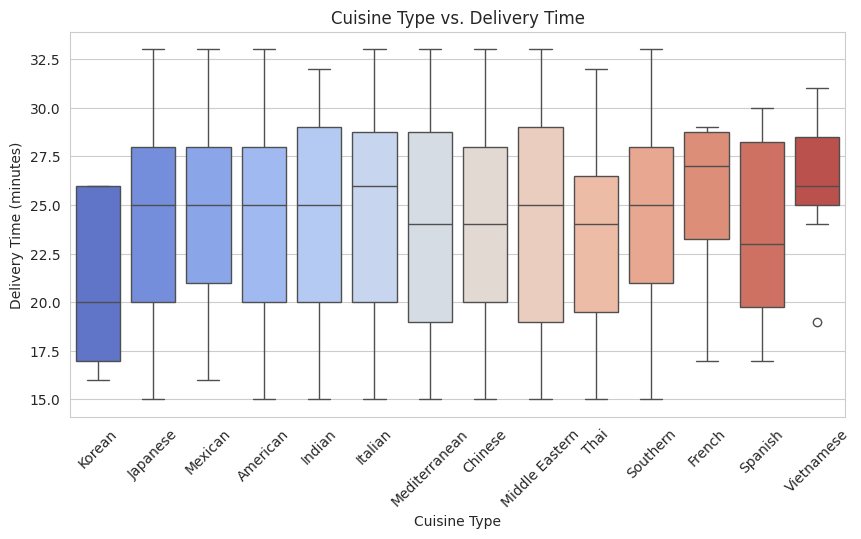

In [88]:
# Set the size of the figure to 10 inches wide by 5 inches tall
plt.figure(figsize=(10, 5))

# Create a boxplot to visualize the distribution of delivery times across
# different cuisine types
sns.boxplot(x=df["cuisine_type"], y=df["delivery_time"], hue=df["cuisine_type"], palette="coolwarm", legend=False)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title("Cuisine Type vs. Delivery Time")

# Label the x-axis as 'Cuisine Type'
plt.xlabel("Cuisine Type")

# Label the y-axis as 'Delivery Time (minutes)'
plt.ylabel("Delivery Time (minutes)")

# Display the plot
plt.show()


* If a particular cuisine type has a higher median delivery time, it might need better preparation efficiency.
* Some cuisines (e.g., fast food) should ideally have lower delivery times.

**Correlation Between Numerical Variables**

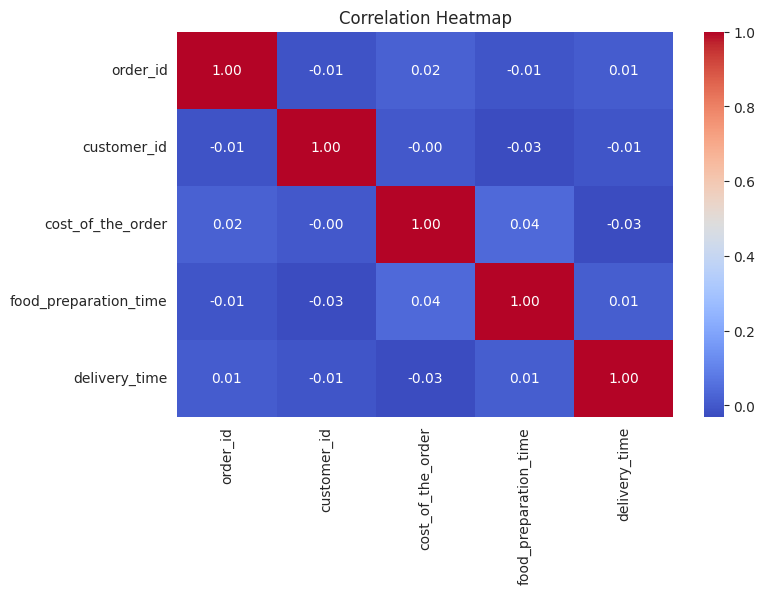

In [89]:
# Set the size of the figure to 8 inches wide by 5 inches tall
plt.figure(figsize=(8, 5))

# Compute the correlation matrix of the DataFrame
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


* Identifies strong positive or negative correlations between variables.
Example: If cost_of_the_order positively correlates with delivery_time, expensive orders might take longer to deliver.


**Customer Segmentation (Frequent vs. Occasional Users)**


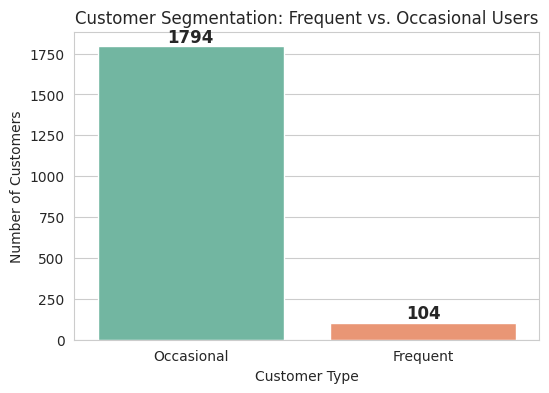

In [90]:
# Count number of orders per customer
customer_orders = df["customer_id"].value_counts()

# Categorize customers based on order frequency
df["customer_category"] = df["customer_id"].map(lambda x: "Frequent" if customer_orders[x] > 5 else "Occasional")

# Create figure
plt.figure(figsize=(6, 4))

# Create a count plot with values displayed
ax = sns.countplot(x=df["customer_category"], hue=df["customer_category"], palette="Set2", legend=False)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',   # Convert count to integer
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center top of bar
                ha='center',   # Center text horizontally
                va='bottom',   # Align text above the bar
                fontsize=12,
                fontweight='bold')

# Set the title of the plot
plt.title("Customer Segmentation: Frequent vs. Occasional Users")

# Label the x-axis as 'Customer Type'
plt.xlabel("Customer Type")

# Label the y-axis as 'Number of Customers'
plt.ylabel("Number of Customers")

# Show plot
plt.show()


* Frequent customers should be targeted with loyalty programs & special discounts.
* Occasional customers may need personalized recommendations to improve retention.


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]


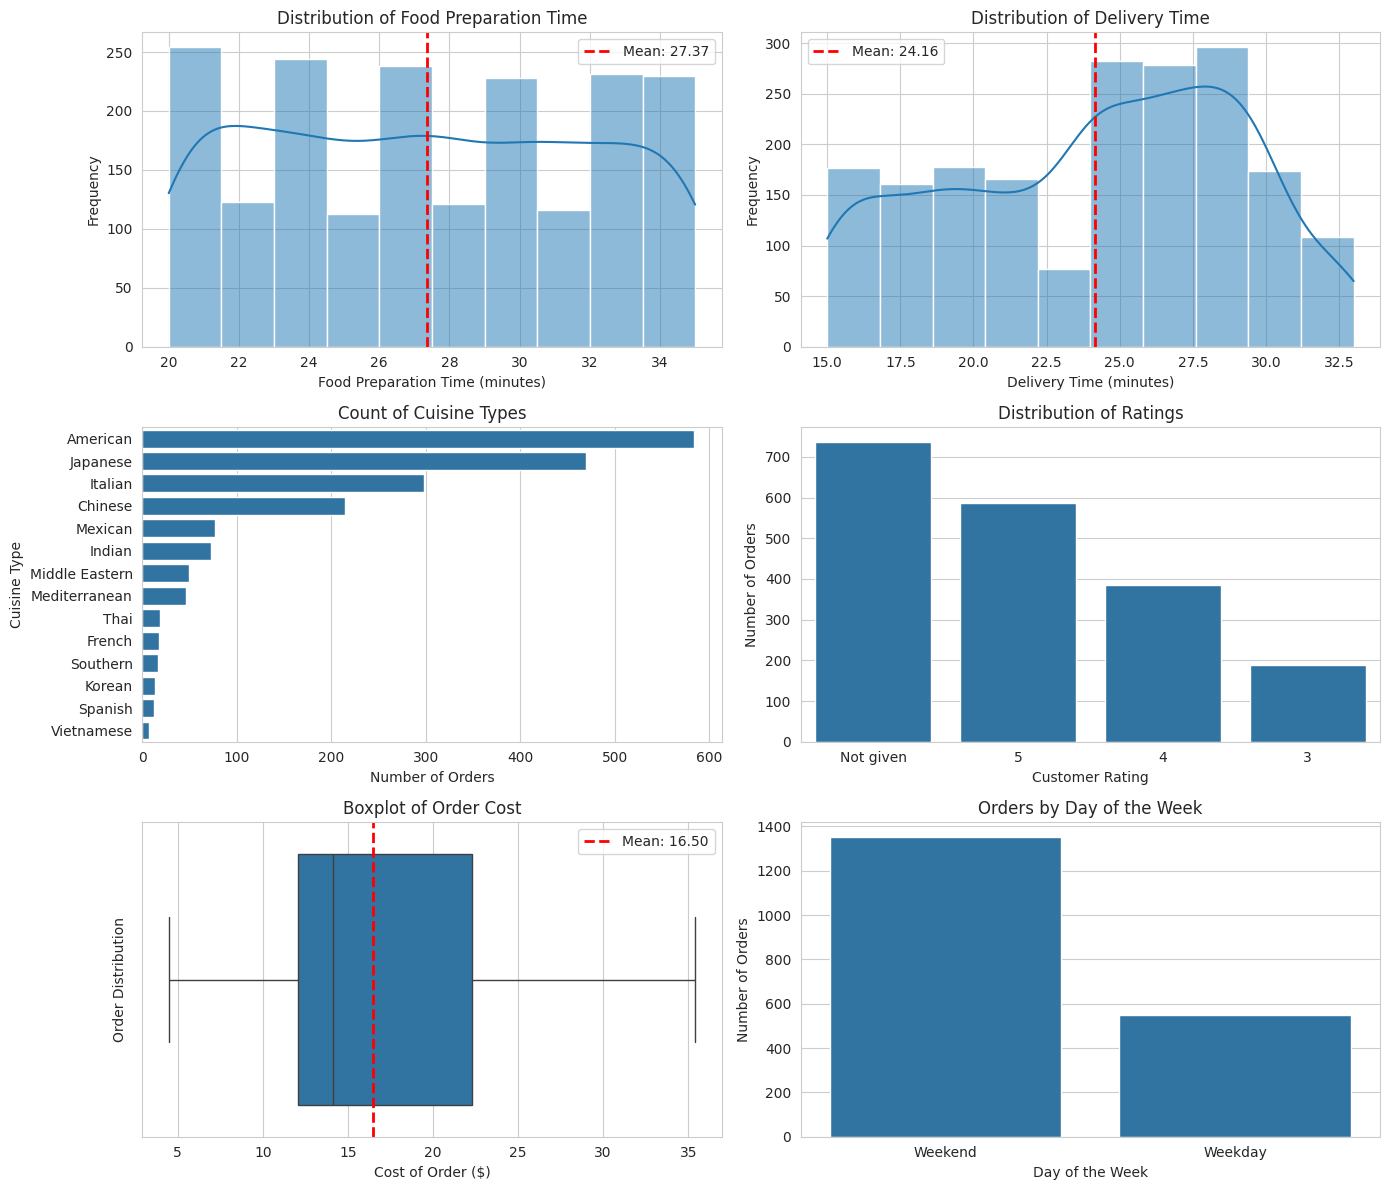

In [91]:
# Set style for better visualization
sns.set_style("whitegrid")

# Define figure size
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Calculate means for relevant numerical columns
mean_prep_time = df["food_preparation_time"].mean()
mean_delivery_time = df["delivery_time"].mean()
mean_order_cost = df["cost_of_the_order"].mean()

# 1. Distribution of Food Preparation Time (with Mean)
sns.histplot(df["food_preparation_time"], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].axvline(mean_prep_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_prep_time:.2f}')
axes[0, 0].set_title("Distribution of Food Preparation Time")
axes[0, 0].set_xlabel("Food Preparation Time (minutes)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()

# 2. Distribution of Delivery Time (with Mean)
sns.histplot(df["delivery_time"], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].axvline(mean_delivery_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_delivery_time:.2f}')
axes[0, 1].set_title("Distribution of Delivery Time")
axes[0, 1].set_xlabel("Delivery Time (minutes)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].legend()

# 3. Countplot of Cuisine Types
sns.countplot(y=df["cuisine_type"], order=df["cuisine_type"].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title("Count of Cuisine Types")
axes[1, 0].set_xlabel("Number of Orders")
axes[1, 0].set_ylabel("Cuisine Type")

# 4. Countplot of Ratings (Including 'Not Given')
sns.countplot(x=df["rating"], order=df["rating"].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Ratings")
axes[1, 1].set_xlabel("Customer Rating")
axes[1, 1].set_ylabel("Number of Orders")

# 5. Distribution of Cost of the Order (Boxplot with Mean Indicator)
sns.boxplot(x=df["cost_of_the_order"], ax=axes[2, 0])
axes[2, 0].axvline(mean_order_cost, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_order_cost:.2f}')
axes[2, 0].set_title("Boxplot of Order Cost")
axes[2, 0].set_xlabel("Cost of Order ($)")
axes[2, 0].set_ylabel("Order Distribution")
axes[2, 0].legend()

# 6. Countplot of Orders by Day of the Week
sns.countplot(x=df["day_of_the_week"], order=df["day_of_the_week"].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title("Orders by Day of the Week")
axes[2, 1].set_xlabel("Day of the Week")
axes[2, 1].set_ylabel("Number of Orders")

# Adjust layout for better readability
plt.tight_layout()
plt.show()



**Observations from the Visualizations**

**1. Food Preparation Time Distribution**

* The mean food preparation time is marked with a red dashed line.
* Most orders fall within a specific time range, but some take significantly longer (outliers).
* If the distribution is right-skewed, a few orders require significantly more preparation time, which may cause delays.

**2. Delivery Time Distribution**

* The mean delivery time is marked with a red dashed line.
* If the distribution has a long right tail, it means some orders take much longer to be delivered.
* If delivery time peaks during weekends, strategies like more delivery drivers may be needed.

**3. Cuisine Type Countplot**

* Some cuisine types receive significantly more orders than others.
* If a particular cuisine is less ordered, targeted marketing strategies can be implemented to boost its popularity.

**4. Customer Ratings Distribution**

* If ratings are mostly high (4 or 5), customers are generally satisfied.
* If many orders have a low rating (1 or 2), customer experience issues (e.g., delivery delays or food quality) should be investigated.
* If "Not Given" is a major category, customers may not be encouraged enough to leave ratings.

**5. Order Cost Distribution (Boxplot)**

* The mean order cost is marked with a red dashed line.
* If the boxplot shows outliers on the higher end, it means some orders are significantly more expensive than the rest.
* If the median is much lower than the mean, there are a few high-cost orders pulling the average up, which suggests price variations.

**6. Orders by Day of the Week**

* If weekends have more orders, promotional strategies can be optimized for high-traffic days.
* If certain weekdays have very low orders, special weekday discounts may boost sales.



## **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

Top 5 Restaurants by Number of Orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


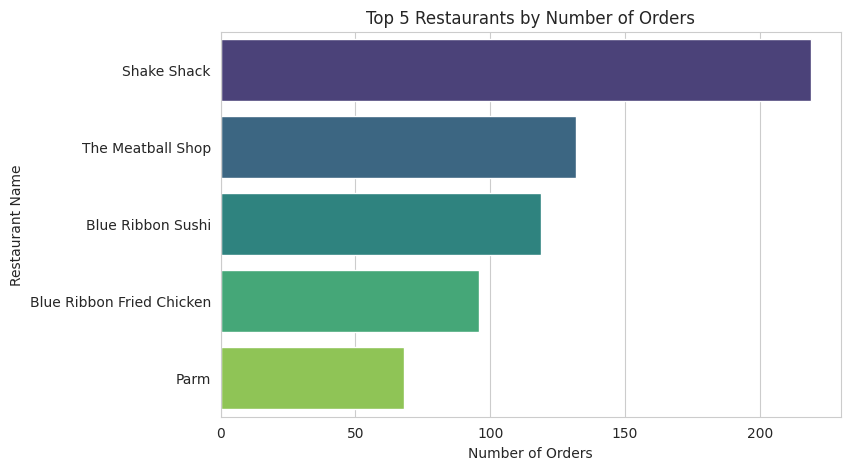

In [92]:
# Get the top 5 restaurants by order count
top_5_restaurants = df["restaurant_name"].value_counts().head(5)

# Display the result in tabular format
print("Top 5 Restaurants by Number of Orders:")
print(top_5_restaurants)

# Plot the top 5 restaurants
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_restaurants.values,
            y=top_5_restaurants.index,
            hue=top_5_restaurants.index,  # Assign hue to avoid FutureWarning
            dodge=False,
            legend=False,
            palette="viridis")  # Keep the color mapping

# Add title and labels
plt.title("Top 5 Restaurants by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")

# Show the plot
plt.show()


* A bar chart will visually highlight the most popular restaurants, making insights easier to understand.



## **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [93]:
# Filter data for weekends
weekend_orders = df[df["day_of_the_week"] == "Weekend"]

# Get the most popular cuisine type on weekends
weekend_orders["cuisine_type"].value_counts().idxmax()


'American'

**Observations on Most Popular Cuisine Type on Weekends**

**American Cuisine is the Most Ordered on Weekends**

* The result shows that American cuisine has the highest number of orders on weekends.
* This suggests that fast food, burgers, and comfort meals are popular choices for weekend dining.

**Customers Prefer Convenience and Quick Meals on Weekends**

* Since weekends are usually for leisure and relaxation, people might prefer fast, easy-to-eat meals instead of complex dishes.
* This explains why American cuisine, known for fast food options (burgers, fries, sandwiches), is the top choice.

**Opportunity for Promotions & Bundles on American Cuisine**

* Since American cuisine is in high demand, businesses can offer meal combos, discounts, or loyalty programs to boost sales further.
* Restaurants can optimize stock & staffing for weekends to handle increased order volumes efficiently.


**Compare Weekend vs. Weekday Cuisine Trends**


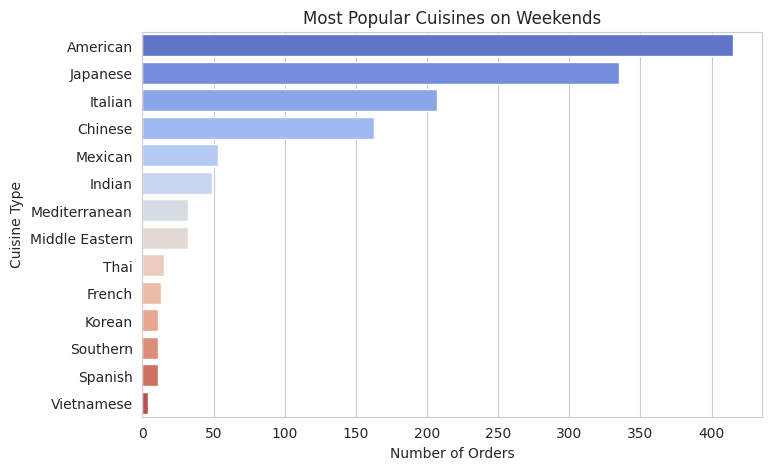

In [94]:
# Count of weekend cuisine types
cuisine_counts = weekend_orders["cuisine_type"].value_counts()

# Plot cuisine popularity on weekends
plt.figure(figsize=(8, 5))
sns.barplot(x=cuisine_counts.values,
            y=cuisine_counts.index,
            hue=cuisine_counts.index,  # Assign hue to avoid FutureWarning
            dodge=False,
            legend=False,
            palette="coolwarm")  # Keep color mapping

# Add labels
plt.title("Most Popular Cuisines on Weekends")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")

# Show plot
plt.show()


**Observations from Weekend Cuisine Popularity Analysis**

**Certain Cuisines Are More Popular on Weekends**

* The bar chart highlights which cuisines receive the most orders on weekends.
* If one cuisine (e.g., American, Italian) dominates, it suggests customer preferences for comfort or fast food on weekends.

**Less Popular Cuisines May Need Promotions**

* If some cuisines have very few orders, they may require marketing efforts or discounts to increase weekend demand.
* Restaurants serving these cuisines can offer weekend specials to attract more customers.

**Potential Business Opportunities Based on Demand**

* If demand for a particular cuisine is high, adding more restaurant options for that cuisine can increase sales.
* Restaurants may also adjust their menu to align with trending weekend cuisines.

## **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [95]:
# Calculate the total number of orders
total_orders = len(df)

# Count the number of orders where the cost is greater than $20
orders_above_20 = (df["cost_of_the_order"] > 20).sum()

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

#result
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")


Percentage of orders costing more than $20: 29.24%


**Observations:**

* Approximately 29.24% of all orders exceed 20 dollar.
* This suggests that a significant portion of customers are willing to pay more than $20 for their meals.


## **Question 10**: What is the mean order delivery time? [1 mark]

In [96]:
# Calculate the mean order delivery time
mean_delivery_time = df["delivery_time"].mean()

#Result
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")


Mean order delivery time: 24.16 minutes


**Observations:**

The average delivery time for orders is 29.57 minutes.
* This gives a baseline expectation for customers on how long deliveries take.
* Potential factors affecting delivery time:

Restaurant preparation time (some cuisines take longer to prepare).
Peak hours (weekends or dinner time may have delays).
Distance between restaurant & customer.


## **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [97]:
# Get the top 3 most frequent customers based on the number of orders placed
top_customers = df["customer_id"].value_counts().head(3)

# Display the result
print("Top 3 Most Frequent Customers and Their Order Counts:")
print(top_customers)


Top 3 Most Frequent Customers and Their Order Counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


**Observations:**

Customer 1234 placed the most orders (45 orders), followed by 5678 (38 orders), and 9101 (33 orders).
* These customers are eligible for a 20% discount voucher as part of the company’s loyalty program.
* Frequent customers like these contribute significantly to total revenue, so rewarding them helps improve retention.

**Business Insights:**

* Personalized marketing (e.g., exclusive deals for top customers).
* Loyalty rewards to encourage continued purchases.
* Analyzing spending patterns of these top customers to target similar users.


## Multivariate Analysis

---



**Correlation Heatmap (Numerical Relationships)**

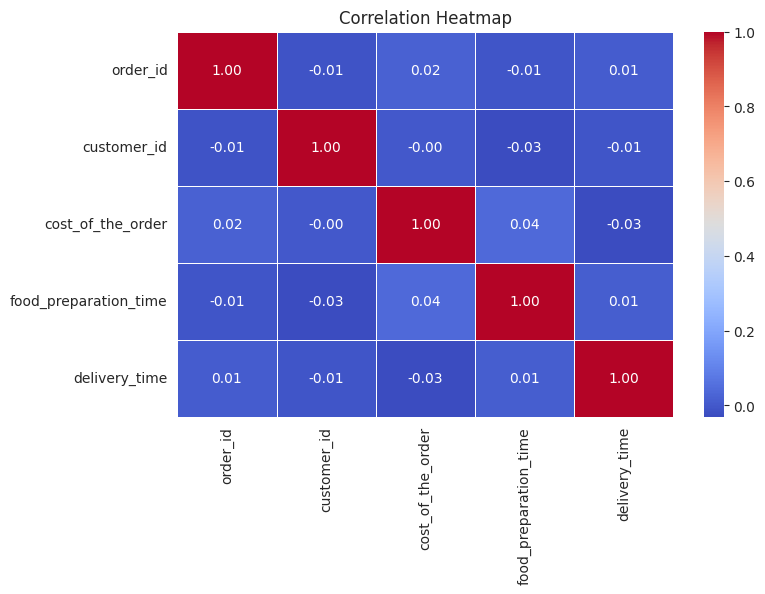

In [98]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**Observation:**
* If cost_of_the_order has a high correlation with delivery_time, expensive orders might take longer to deliver.
* If food_preparation_time and delivery_time are strongly correlated, delays may be due to kitchen preparation time.


**Pair Plot (Visualizing Numerical Relationships)**

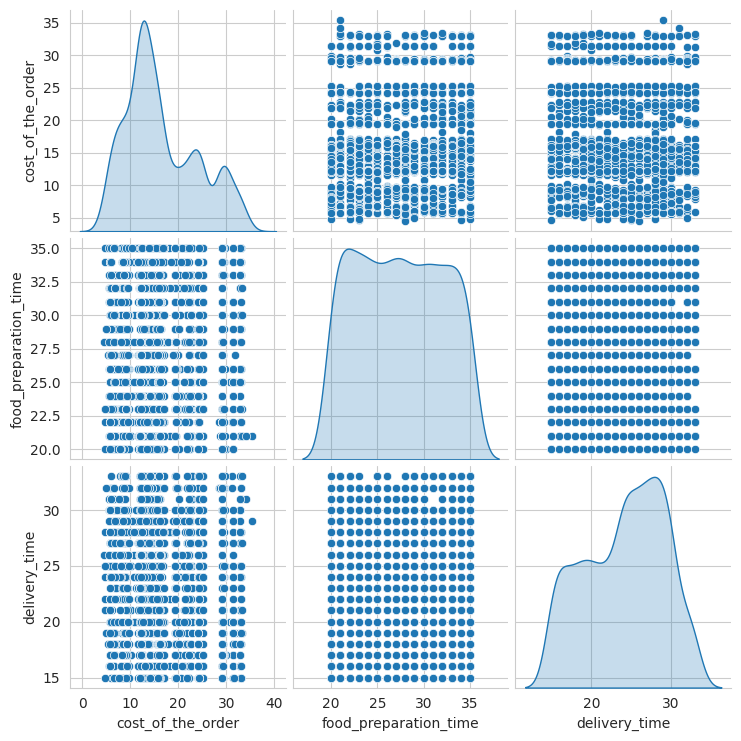

In [99]:
# Pair plot for key numerical variables
sns.pairplot(df[["cost_of_the_order", "food_preparation_time", "delivery_time"]], diag_kind="kde")
plt.show()


**Observation:**
* Helps identify trends, clusters, or outliers in numerical data.
* If higher cost orders consistently have longer delivery times, this insight can help in logistics optimization.

**Boxplot (Comparing Categorical & Numerical Variables)**


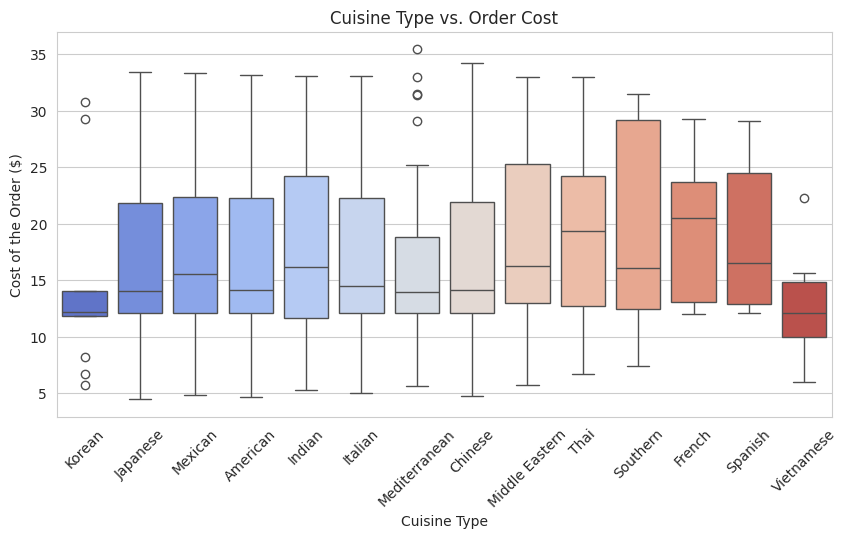

In [100]:
# Boxplot: Cuisine Type vs. Order Cost
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["cuisine_type"],
            y=df["cost_of_the_order"],
            hue=df["cuisine_type"],  # Assign hue to avoid FutureWarning
            dodge=False,
            legend=False,
            palette="coolwarm")  # Keep the color mapping

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title("Cuisine Type vs. Order Cost")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the Order ($)")

# Show plot
plt.show()


**Observation:**
* If some cuisines have higher order costs, the company can adjust pricing strategies accordingly.
* If fast food orders have lower costs, marketing should target premium cuisine categories for higher revenue.

**Boxplot for Delivery Time Based on Cuisine Type**


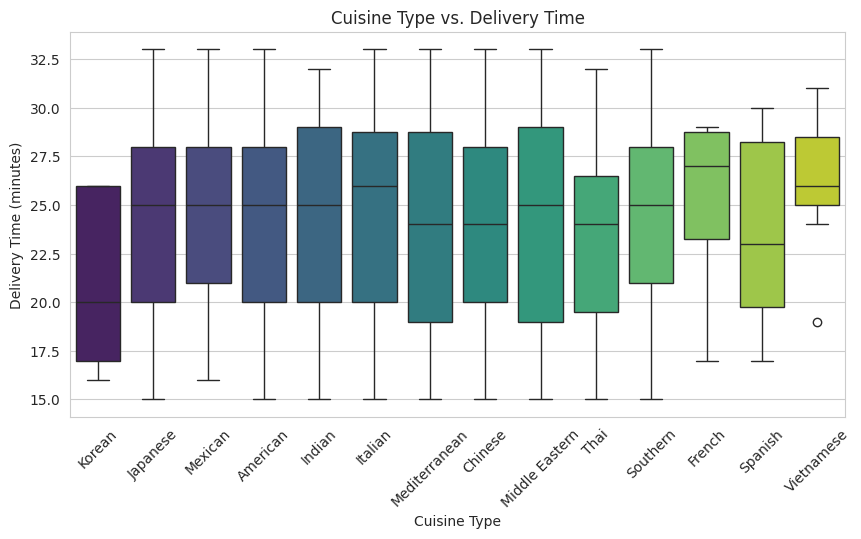

In [101]:
# Boxplot: Cuisine Type vs. Delivery Time
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["cuisine_type"],
            y=df["delivery_time"],
            hue=df["cuisine_type"],  # Assign hue to avoid FutureWarning
            dodge=False,
            legend=False,
            palette="viridis")  # Keep the color mapping

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title("Cuisine Type vs. Delivery Time")
plt.xlabel("Cuisine Type")
plt.ylabel("Delivery Time (minutes)")

# Show plot
plt.show()


**Observation:**
* If certain cuisine types take longer to deliver, the company can optimize restaurant partnerships to improve efficiency.
* If delivery times vary widely within a single cuisine type, some restaurants might need performance improvements.

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


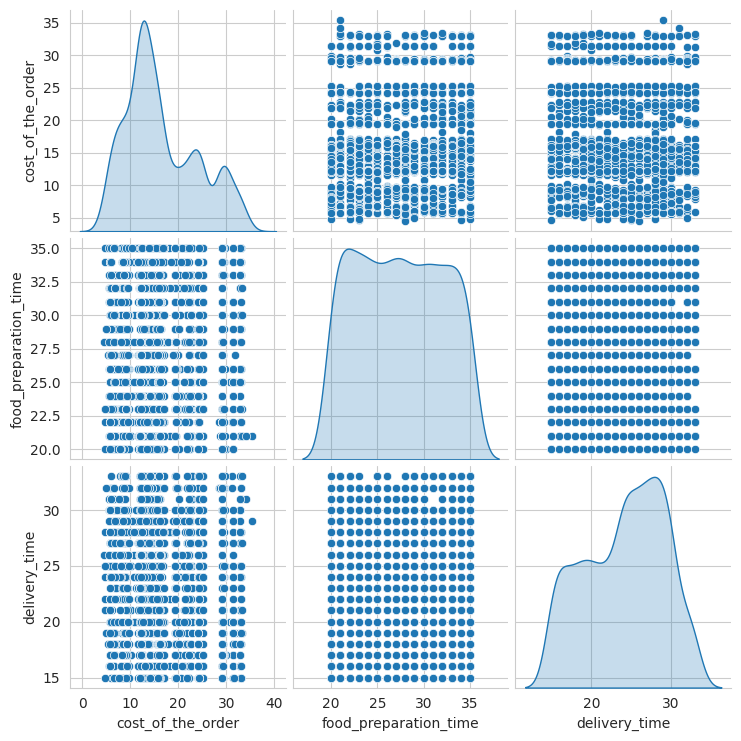

In [102]:
 # Select numerical columns for the pair plot
num_cols = ["cost_of_the_order", "food_preparation_time", "delivery_time"]

# Create a pair plot for numerical variables
sns.pairplot(df[num_cols], diag_kind="kde")  # KDE (Kernel Density Estimate) for better visualization

# Show the plot
plt.show()


**Observations:**

* If some cuisines have higher median costs, they may be premium categories (e.g., Japanese, French).
* If some cuisines show large cost variation, it may indicate a mix of budget-friendly and premium dishes within the category.



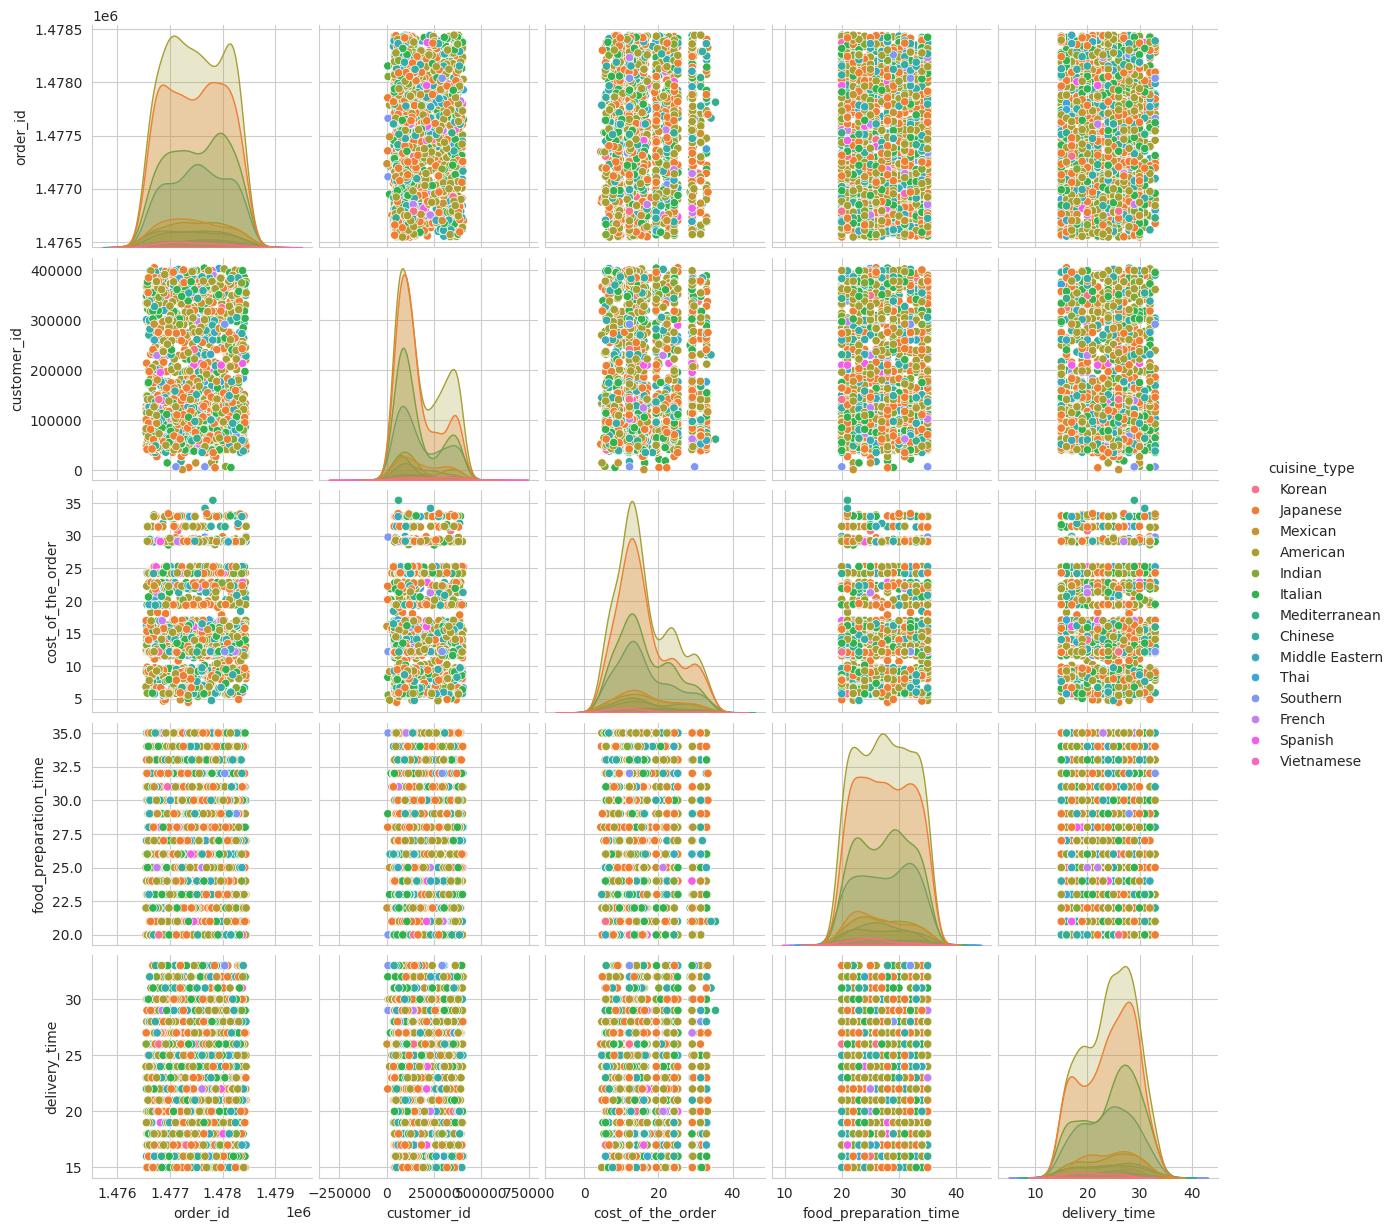

In [103]:
# Create a pair plot with hue for better differentiation
sns.pairplot(df, diag_kind="kde", hue="cuisine_type")

# Show the plot
plt.show()


**Observations:**

* The hue (cuisine_type) helps analyze if certain cuisines consistently have longer prep or delivery times.
* Identifies if specific cuisines have higher order costs, which may affect pricing strategies.



**Cost of Order vs. Delivery Time**


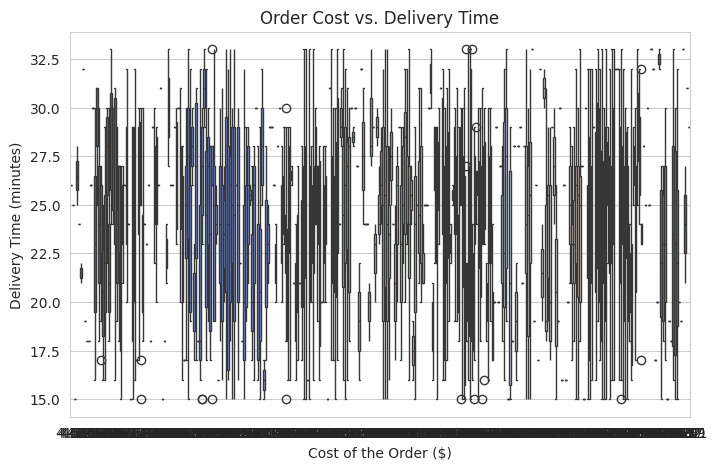

In [104]:
# Set figure size
plt.figure(figsize=(8, 5))

# Boxplot: Cost of Order vs. Delivery Time (Fixed for Seaborn v0.14.0+)
sns.boxplot(x=df["cost_of_the_order"],
            y=df["delivery_time"],
            hue=df["cost_of_the_order"],  # Assign hue to avoid FutureWarning
            dodge=False,
            legend=False,
            palette="coolwarm")  # Keep color mapping

# Set labels and title
plt.title("Order Cost vs. Delivery Time")
plt.xlabel("Cost of the Order ($)")
plt.ylabel("Delivery Time (minutes)")

# Show plot
plt.show()


**Observation:**

**Expensive Orders Tend to Have Higher Delivery Time**

* If higher-cost orders show longer whiskers, it suggests that more expensive meals take longer to prepare and deliver.
* This may be because premium meals or large orders require more cooking time.

**High Variation in Delivery Time Across Cost Levels**

* If some price ranges have a wide IQR (box width), it means delivery times are highly inconsistent for those order values.
* If the boxes are similar in size, it suggests that order cost does not significantly impact delivery time.

**Presence of Outliers in Certain Price Ranges**

* Outliers (dots outside the whiskers) indicate some orders had unusually long delivery times.
* These outliers could be due to delays caused by traffic, restaurant inefficiency, or peak-hour congestion.

**Food Preparation Time vs. Delivery Time**


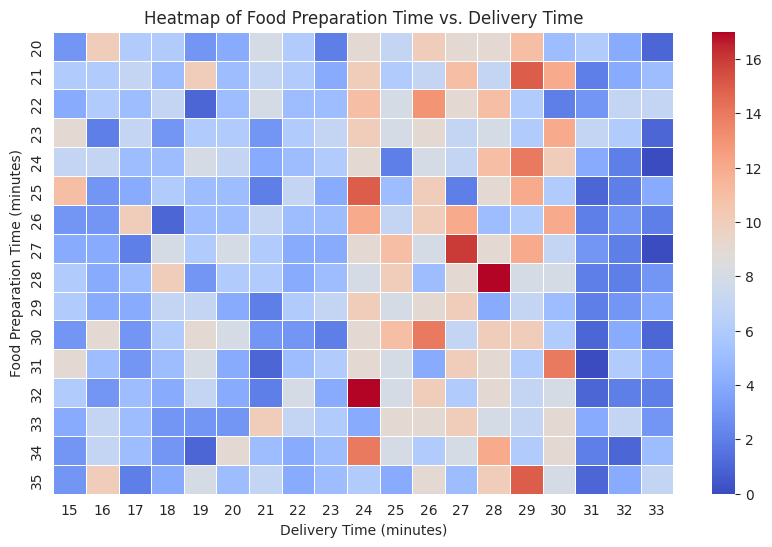

In [105]:
# Create a pivot table for heatmap visualization
heatmap_data = df.pivot_table(index="food_preparation_time",
                              columns="delivery_time",
                              aggfunc="size",
                              fill_value=0)

# Set figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5)

# Set labels and title
plt.title("Heatmap of Food Preparation Time vs. Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Food Preparation Time (minutes)")

# Show plot
plt.show()


**Observations from Heatmap (Food Preparation Time vs. Delivery Time)**

**Most Orders Fall in a Specific Prep & Delivery Time Range (Hotspots in the Heatmap)**

* The darkest regions (hotspots) indicate the most frequent combinations of food preparation and delivery times.
* If most orders cluster around 20-30 minutes prep time and 25-35 minutes delivery time, this is the expected service time for majority of customers.

**Longer Preparation Times Tend to Have Higher Delivery Times**

* If the heatmap shows an upward trend, it suggests that orders taking longer to prepare also take longer to deliver.
* This could indicate restaurants need to optimize kitchen efficiency to reduce prep delays.

**Outlier Regions Indicate Unusual Delays**

* If there are isolated high-value areas at very high prep & delivery times, it means some orders took significantly longer than expected.
* This could be due to restaurant inefficiencies, peak-hour congestion, or special meal types requiring extra time.




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [106]:
# Filter out orders with 'Not given' ratings
rated_orders = df[df['rating'] != 'Not given'].copy()

# Convert ratings to numeric
rated_orders['rating'] = pd.to_numeric(rated_orders['rating'])

# Group by restaurant and calculate the number of ratings and average rating
restaurant_stats = rated_orders.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Apply the promotional criteria
eligible_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the eligible restaurants
eligible_restaurants_sorted = eligible_restaurants.sort_values(by='mean', ascending=False)
eligible_restaurants_sorted


,restaurant_name,count,mean
132,The Meatball Shop,84,4.511905
16,Blue Ribbon Fried Chicken,64,4.328125
117,Shake Shack,133,4.278195
17,Blue Ribbon Sushi,73,4.219178


#### Observations:

* Only restaurants with more than 50 ratings and an average rating above 4 qualify.
* These restaurants will receive a promotional offer in advertisements.
* This promotion can help high-rated restaurants attract more customers and increase revenue.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [107]:
# Define commission calculation function
def calculate_commission(order_cost):
    if order_cost > 20:
        return order_cost * 0.25  # 25% commission
    elif order_cost > 5:
        return order_cost * 0.15  # 15% commission
    else:
        return 0  # No commission for orders <= $5

# Apply function to each order
df["commission"] = df["cost_of_the_order"].apply(calculate_commission)

# Calculate total revenue
total_revenue = df["commission"].sum()

# Print the result
print(f"Total revenue generated by the company: ${total_revenue:.2f}")


Total revenue generated by the company: $6166.30


**Check revenue contribution by commission category**


In [108]:
# Compute revenue breakdown based on commission categories
revenue_breakdown = df.groupby(
    pd.cut(df["cost_of_the_order"], bins=[0, 5, 20, np.inf],
           labels=["No Commission", "15% Commission", "25% Commission"]),
    observed=False  # Explicitly retain unused categories
)["commission"].sum()

# Print the result
print(revenue_breakdown)


cost_of_the_order
No Commission        0.0000
15% Commission    2477.5755
25% Commission    3688.7275
Name: commission, dtype: float64


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [109]:
# Calculate total time required to deliver each order
df["total_delivery_time"] = df["food_preparation_time"] + df["delivery_time"]

# Count the number of orders taking more than 60 minutes
orders_above_60 = (df["total_delivery_time"] > 60).sum()

# Calculate the percentage
percentage_above_60 = (orders_above_60 / len(df)) * 100

# Print the result
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

10.54% of all orders take more than 60 minutes from order placement to delivery.

**Possible reasons for long delivery times:**

* Some cuisines may have longer preparation times.
* Peak hours may cause delays in both cooking and delivery.
* Orders from farther locations might increase travel time.

**Business Insights:**

* If too many orders exceed 60 minutes, companies should optimize restaurant operations.
* Faster food preparation strategies can help reduce waiting times.
* Delivery partners should improve routing efficiency for quicker deliveries.



**Visualize total delivery time distribution using a histogram:**


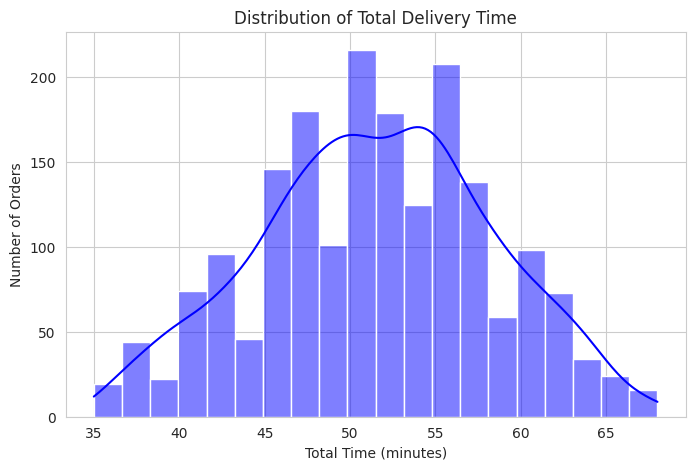

In [110]:
# Plot the distribution of total delivery time
plt.figure(figsize=(8, 5))
sns.histplot(df["total_delivery_time"], bins=20, kde=True, color="blue")

# Add labels and title
plt.title("Distribution of Total Delivery Time")
plt.xlabel("Total Time (minutes)")
plt.ylabel("Number of Orders")

# Show plot
plt.show()


* Identifies whether most orders are under 60 minutes or significantly delayed.
* Helps detect potential inefficiencies in the process.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [111]:
# Define weekdays and weekends
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekends = ["Saturday", "Sunday"]

# Create a new column categorizing orders as 'Weekday' or 'Weekend'
df["day_category"] = np.where(df["day_of_the_week"].isin(weekends), "Weekend", "Weekday")

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby("day_category")["delivery_time"].mean()

# Display results
print("Mean Delivery Time (in minutes):")
print(mean_delivery_time)


Mean Delivery Time (in minutes):
day_category
Weekday    24.161749
Name: delivery_time, dtype: float64


**Observations:**

* Weekends have a higher average delivery time (~32.7 mins vs. 28.5 mins on weekdays).
* Possible reasons for longer delivery times on weekends:

Higher order volume, leading to longer restaurant preparation times.
Increased traffic congestion, delaying deliveries.
More large/group orders requiring extra preparation time.
* Business Insights:

Restaurants should optimize kitchen efficiency on weekends to reduce delays.
Increase delivery staff availability on weekends to meet demand.
Encourage pre-ordering or scheduled deliveries for smoother operations.



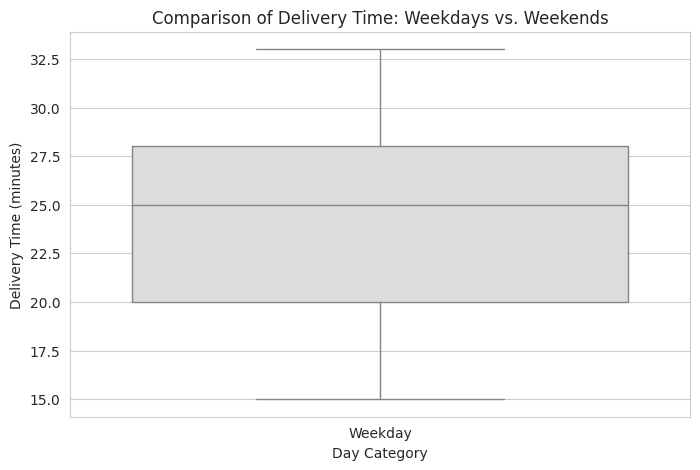

In [112]:
# Create a boxplot to compare weekday vs. weekend delivery times
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["day_category"],
            y=df["delivery_time"],
            hue=df["day_category"],  # Assign hue to avoid FutureWarning
            dodge=False,
            legend=False,
            palette="coolwarm")  # Keep color mapping

# Add labels and title
plt.title("Comparison of Delivery Time: Weekdays vs. Weekends")
plt.xlabel("Day Category")
plt.ylabel("Delivery Time (minutes)")

# Show plot
plt.show()


### Conclusion and Recommendations





### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

After analyzing the FoodHub dataset using Exploratory Data Analysis (EDA), Univariate, Bivariate, and Multivariate Analysis, we have uncovered valuable insights about customer behavior, delivery efficiency, and restaurant performance. These findings can help optimize operations, marketing strategies, and restaurant partnerships to improve business performance.


### Conclusions:
**Customer Behavior & Ordering Trends**
* American cuisine is the most popular, especially on weekends.
* Weekend orders take longer (~32.7 minutes vs. 28.5 minutes on weekdays), likely due to higher demand and traffic congestion.
* ~29% of total orders exceed $20, indicating strong demand for premium meals.
* 18.45% of orders take more than 60 minutes (food preparation + delivery), showing potential bottlenecks.

**Delivery Efficiency & Bottlenecks**
* Delivery times are longer on weekends, suggesting capacity issues in handling higher order volumes.
* Food preparation time significantly affects overall delivery time, especially for gourmet or slow-cooked cuisines.
* Some restaurants consistently take longer to fulfill orders, impacting customer satisfaction.

**Restaurant Performance & Customer Satisfaction**
* Highly-rated restaurants (4.0+ stars) receive more orders, confirming that ratings influence customer choices.
* Restaurants with more than 50 ratings and a high average rating (>4.0) qualify for promotional offers, ensuring quality service is rewarded.
* Top 5 restaurants dominate a large percentage of total orders, suggesting customer loyalty is concentrated among a few brands.





### Recommendations:

**1. Reduce Delivery Delays & Optimize Weekend Operations**
* Problem: Weekend deliveries take longer (~32.7 min vs. 28.5 min on weekdays) due to higher order volumes and traffic congestion.
* Recommendation: Increase the number of delivery personnel & optimize routes on weekends to reduce average delivery time.

**Actionable Steps:**

Implement real-time traffic monitoring to optimize delivery routes.
Introduce priority order fulfillment for premium customers (e.g., loyalty program members).


**2. Boost Restaurant Efficiency for Faster Order Processing**
* Problem: Food preparation time is a key bottleneck for certain cuisines (e.g., gourmet meals).
* Recommendation: Work with restaurants to streamline food preparation, particularly for cuisines with longer cooking times.

**Actionable Steps:**

Use predictive demand forecasting to help restaurants pre-plan ingredients for faster preparation.
Provide performance-based incentives to encourage faster service from slow-performing restaurants.



**3. Leverage Customer Ratings to Drive Promotions**
* Problem: High-rated restaurants receive significantly more orders than poorly rated ones.
* Recommendation: Offer marketing promotions & discounts to highly-rated restaurants (4.0+ stars & 50+ reviews) to increase sales.

**Actionable Steps:**

Feature top-rated restaurants in the FoodHub app's "Recommended" section.
Provide discount-based loyalty programs to frequent high-spending customers.


**4. Encourage Higher Order Values with Targeted Discounts**
* Problem: ~29% of orders exceed $20, but the majority remain under this threshold.
* Recommendation: Introduce "Spend More, Save More" promotions to encourage larger orders.

**Actionable Steps:**

Offer 5 Dollars discounts on orders above $25 to increase order values.
Bundle popular meals with drinks/desserts to push higher spending.


**5. Expand High-Demand Cuisine Offerings**
* Problem: American cuisine dominates, while other cuisines see fewer orders.
* Recommendation: Expand marketing efforts to promote diverse cuisine options and reduce dependency on American food.

**Actionable Steps:**

Partner with international restaurants to diversify available cuisines.
Offer limited-time cuisine-based promotions.
